In [2]:
# Google Colab: ANN untuk Klasifikasi Penyakit Paru-paru
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score
import joblib

ModuleNotFoundError: No module named 'sklearn'

In [16]:
# Load dataset
df = pd.read_csv('/content/predic_tabel.csv')  # Ganti path sesuai lokasi di Colab


In [17]:
# Before encoding, inspect the data types and sample data
print("Data types before encoding:")
print(df.dtypes)
print("\nSample data before encoding:")
print(df.head())

Data types before encoding:
No                     int64
Usia                  object
Jenis_Kelamin         object
Merokok               object
Bekerja               object
Rumah_Tangga          object
Aktivitas_Begadang    object
Aktivitas_Olahraga    object
Asuransi              object
Penyakit_Bawaan       object
Hasil                 object
dtype: object

Sample data before encoding:
   No  Usia Jenis_Kelamin Merokok Bekerja Rumah_Tangga Aktivitas_Begadang  \
0   1   Tua          Pria   Pasif   Tidak           Ya                 Ya   
1   2   Tua          Pria   Aktif   Tidak           Ya                 Ya   
2   3  Muda          Pria   Aktif   Tidak           Ya                 Ya   
3   4   Tua          Pria   Aktif      Ya        Tidak              Tidak   
4   5  Muda        Wanita   Pasif      Ya        Tidak              Tidak   

  Aktivitas_Olahraga Asuransi Penyakit_Bawaan  Hasil  
0             Sering      Ada           Tidak     Ya  
1             Jarang      Ada       

In [18]:
# Label encoding untuk kolom kategorik
le = LabelEncoder()
for col in ['Jenis_Kelamin', 'Bekerja', 'Rumah_Tangga', 'Aktivitas_Begadang', 'Aktivitas_Olahraga', 'Asuransi', 'Penyakit_Bawaan', 'Merokok', 'Usia', 'Hasil']:
    df[col] = le.fit_transform(df[col])


In [19]:
# Pisahkan fitur dan target
X = df.drop(columns=['Hasil'])
y = df['Hasil']

In [20]:
# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [21]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [22]:
# Buat model ANN
model = Sequential()
model.add(Dense(16, input_dim=X.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output untuk klasifikasi biner


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [24]:
# Latih model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7836 - loss: 0.4402 - val_accuracy: 0.9469 - val_loss: 0.0904
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9455 - loss: 0.0883 - val_accuracy: 0.9469 - val_loss: 0.0825
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9463 - loss: 0.0856 - val_accuracy: 0.9469 - val_loss: 0.0815
Epoch 4/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9481 - loss: 0.0833 - val_accuracy: 0.9469 - val_loss: 0.0815
Epoch 5/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9428 - loss: 0.0870 - val_accuracy: 0.9469 - val_loss: 0.0821
Epoch 6/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9496 - loss: 0.0819 - val_accuracy: 0.9469 - val_loss: 0.0812
Epoch 7/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9427 - loss: 0.0848 - val_accuracy: 0.9469 - val_loss: 0.0812
Epoch 8/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9492 - loss: 0.0806 - val_accuracy: 0.

In [25]:
# Evaluasi
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy: 0.9426666666666667
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3075
           1       1.00      0.88      0.94      2925

    accuracy                           0.94      6000
   macro avg       0.95      0.94      0.94      6000
weighted avg       0.95      0.94      0.94      6000



In [26]:
# Simpan model dan scaler
model.save("model_paru_paru.h5")
import joblib
joblib.dump(scaler, "scaler.save")

['scaler.save']

Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9486 - loss: 0.0808 - val_accuracy: 0.9469 - val_loss: 0.0811
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9440 - loss: 0.0851 - val_accuracy: 0.9469 - val_loss: 0.0812
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9474 - loss: 0.0841 - val_accuracy: 0.9469 - val_loss: 0.0811
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9466 - loss: 0.0831 - val_accuracy: 0.9469 - val_loss: 0.0811
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9499 - loss: 0.0801 - val_accuracy: 0.9469 - val_loss: 0.0811
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9455 - loss: 0.0835 - val_accuracy: 0.9469 - val_loss: 0.0811
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9473 - loss: 0.0814 - val_accuracy: 0.9469 - val_loss: 0.0811
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9494 - loss: 0.0797 - val_accuracy: 0.

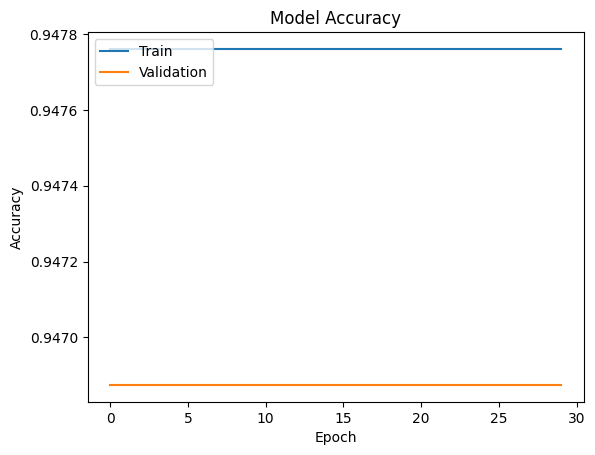

In [30]:
import matplotlib.pyplot as plt

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

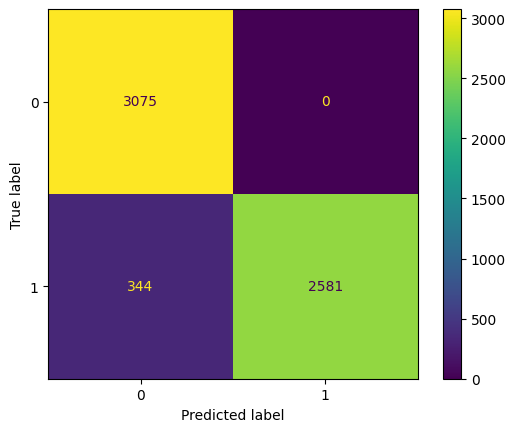

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3075
           1       1.00      0.88      0.94      2925

    accuracy                           0.94      6000
   macro avg       0.95      0.94      0.94      6000
weighted avg       0.95      0.94      0.94      6000



In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3075    0]
 [ 344 2581]]
